In [131]:
import pandas as pd
import numpy as np

In [132]:
df = pd.read_csv("../Scraping/PropertiesInfo_.csv")

In [133]:
df["price"].head()

0             $320
1             $700
2    $395 per week
3    $370 per week
4    $500 per week
Name: price, dtype: object

In [134]:
print(f'the initial length of the dataframe is {len(df)}')

the initial length of the dataframe is 15179


In [135]:
import re
lst = []
for i in range(len(df)):
    price = df['price'].iloc[i].split(" ")
    lst.append(price)
print(lst[0:5]) 
# the reason for this is that some price looks like "Student Only - $330 per week - furnished"
# as price dosen't always appear at the first place, it's better to loop all the words in every price

[['$320'], ['$700'], ['$395', 'per', 'week'], ['$370', 'per', 'week'], ['$500', 'per', 'week']]


In [136]:
valid_price_lst = []
for pricelst in lst:
    valid_price = [price for price in pricelst if (price[0] == "$")] # some data demonstrated two rent price e.g "$680PW, $2955.00PCM"
    valid_price_lst.append(valid_price)                           # thus we will keep both $values and drop the montly one 
one_price_lst = []
for price_lst in valid_price_lst:
    if price_lst:
        one_price_lst.append(price_lst[0]) # we assume that the weekly rent value will always present first
    else:
        one_price_lst.append("")
one_price_lst
print(one_price_lst[0:5])
print(f'the price list containing the weekly rent is of length {len(one_price_lst)}')

['$320', '$700', '$395', '$370', '$500']
the price list containing the weekly rent is of length 15179


In [137]:
price_num_lst = []
for price in one_price_lst:
    if "." in price:
        price = price[:price.index(".")] # convert $450.00 and $450.99 to $450
    if "/" in price:
        price = price[:price.index("/")] # some price has no space "$690pw/$2998pcm", we slice out the later part
    price=''.join(char for char in price if char.isdigit()) # keep numbers only drop other illustration words
    if price:
        price = int(price)
        price_num_lst.append(price)
    else:
        price = np.nan # some rental price consists word only "contact manager", thus we make them as nan and drop later
        price_num_lst.append(price)
print(price_num_lst[0:5])
print(f'the price list containing the weekly rent is of length {len(price_num_lst)}')

[320, 700, 395, 370, 500]
the price list containing the weekly rent is of length 15179


In [138]:
df['weekly_rent'] = price_num_lst
df2 = df.dropna()
print(f'{len(df) - len(df2)} data was dropped as no rental price was demonstrated')

557 data was dropped as no rental price was demonstrated


In [139]:
df2.to_csv('price.csv')

In [140]:
df3 = df2[df2['weekly_rent'] > 9999] # probably just dump the year rent ones.
df3

,id,time,listing_type,price,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent
328,15503116,2021-11-04T14:22:27,Rent,"$33,000 Per Year",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"SHOP 101R/228 A'BECKETT STREET, Melbourne",MELBOURNE,3000,-37.810310,144.956650,33000.0
1256,14870244,2021-01-30T11:47:10,Rent,"$85,000.00",ApartmentUnitFlat,Maribyrnong City Council - Greater Area,0.0,0.0,12.0,3.0,6,"110 Beevers Street, Footscray",FOOTSCRAY,3011,-37.795840,144.906000,85000.0
7407,16015137,2022-08-01T13:12:19,Rent,"$425pw$1,847pcm",ApartmentUnitFlat,Boroondara City Council - Greater Area,0.0,0.0,2.0,1.0,1,"2/1 Maling Road, Canterbury",CANTERBURY,3126,-37.829456,145.074051,4251847.0
7599,14114830,2020-03-26T09:50:13,Rent,$700-$750/PW,ApartmentUnitFlat,Whitehorse City Council - Greater Area,0.0,0.0,3.0,3.0,2,"701/21 Poplar Street, Box Hill",BOX HILL,3128,-37.814648,145.116730,700750.0
8435,13350636,2019-07-01T16:25:06,Rent,"$120,000 plus gst and plus outgoings pa.",House,Stonnington - Greater Area,0.0,0.0,18.0,5.0,0,"15 Webster Street, Malvern East",MALVERN EAST,3145,-37.887543,145.087300,120000.0
9046,15845353,2022-04-20T22:20:26,Rent,$38000+GST+Outgoing,SemiDetached,Glen Eira Council - Greater Area,0.0,0.0,4.0,2.0,3,"821 Glen Huntly Road, Caulfield",CAULFIELD,3162,-37.886814,145.022900,38000.0
9830,15570770,2021-12-06T15:41:55,Rent,$160-$200 weekly,Studio,Dandenong - Greater Area,0.0,0.0,1.0,1.0,0,"74 Jones Road, Dandenong",DANDENONG,3175,-37.977062,145.202209,160200.0
14333,9924147,2015-07-22T17:18:42,Rent,$100-$200,House,Warragul & Baw Baw - Greater Area,0.0,0.0,1.0,1.0,0,"72 Waterloo Road, Trafalgar",TRAFALGAR,3824,-38.206640,146.154861,100200.0
14853,15895819,2022-05-20T16:09:11,Rent,"$47,000 per annum",ApartmentUnitFlat,Mornington Peninsula & District - Greater Area,0.0,0.0,3.0,1.0,2,"3745 Point Nepean Road, Portsea",PORTSEA,3944,-38.320595,144.714500,47000.0


In [141]:
result = df2[df2['weekly_rent'] < 9999]
result.head(10)

,id,time,listing_type,price,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent
0,16066003,2022-08-31T13:00:15,Rent,$320,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"1007/238 Flinders St, Melbourne",MELBOURNE,3000,-37.817516,144.966492,320.0
1,16065974,2022-08-31T12:50:55,Rent,$700,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,2.0,0,"1211/260 Spencer Street, Melbourne",MELBOURNE,3000,-37.814564,144.952286,700.0
2,15302782,2022-08-31T10:12:30,Rent,$395 per week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"504/350 La Trobe Street, Melbourne",MELBOURNE,3000,-37.810680,144.959274,395.0
3,16064379,2022-08-30T15:20:28,Rent,$370 per week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"1106/555 Flinders Street, Melbourne",MELBOURNE,3000,-37.820972,144.956482,370.0
4,16064243,2022-08-30T14:50:32,Rent,$500 per week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,1,"2901/200 Spencer Street, Melbourne",MELBOURNE,3000,-37.816227,144.953247,500.0
5,16063884,2022-08-30T13:28:24,Rent,$2500 Per Week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,3.0,2,"5401/464 Collins Street, Melbourne",MELBOURNE,3000,-37.817562,144.958588,2500.0
6,16063772,2022-08-30T13:01:47,Rent,$450.00 per week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,1.0,1.0,0,"405/39 Queen Street, Melbourne",MELBOURNE,3000,-37.817886,144.961731,450.0
7,16063139,2022-08-30T10:15:45,Rent,$530,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,0,"625/118 Franklin Street, Melbourne",MELBOURNE,3000,-37.808205,144.958908,530.0
8,16062720,2022-08-29T17:38:39,Rent,$550 per week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"1206/118 Russell Street, Melbourne",MELBOURNE,3000,-37.813587,144.968719,550.0
9,16062428,2022-08-29T16:32:47,Rent,$680,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,2.0,0,"1411/120 A Beckett St, Melbourne",MELBOURNE,3000,-37.809307,144.959732,680.0


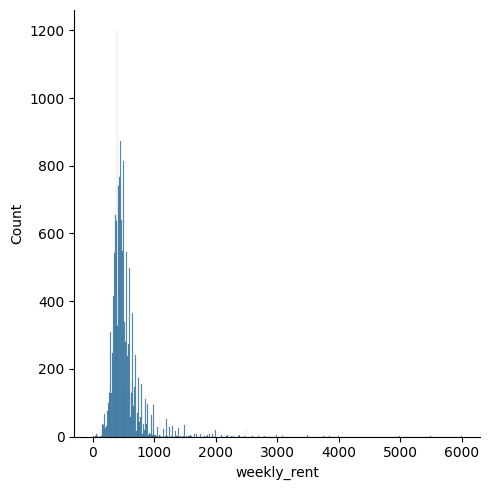

In [142]:
import seaborn as sns
sns.displot(result, x="weekly_rent")

In [143]:
df4 = result[result['weekly_rent'] > 2000] # view the expensive ones see if they'are outliers
df4.head(50)

,id,time,listing_type,price,property_type,area,building_area,land_area,bedrooms,bathrooms,carspaces,street_address,suburb,postcode,latitude,longitude,weekly_rent
5,16063884,2022-08-30T13:28:24,Rent,$2500 Per Week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,3.0,2,"5401/464 Collins Street, Melbourne",MELBOURNE,3000,-37.817562,144.958588,2500.0
59,15951316,2022-06-23T16:34:40,Rent,$2800 Per Week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,3.0,3,"251/350 St Kilda Road, Melbourne",MELBOURNE,3000,-37.831142,144.970856,2800.0
60,15939303,2022-06-16T20:06:19,Rent,$4500 Per Week,ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,4,"4203/35 Spring Street, Melbourne",MELBOURNE,3000,-37.814170,144.974000,4500.0
130,16044913,2022-08-18T09:02:14,Rent,"$2,250",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,2,"UNIT 2707/35 SPRING STREET, Melbourne",MELBOURNE,3000,-37.814170,144.974000,2250.0
179,15631154,2022-01-05T18:50:50,Rent,"$3,100 per week",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,1,"7302/462 Elizabeth Street, Melbourne",MELBOURNE,3000,-37.807857,144.960617,3100.0
293,15998618,2022-07-21T15:03:34,Rent,"$2,500 PW -TWO LEVELS",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,2,"241/299 Queen Street, Melbourne",MELBOURNE,3000,-37.811474,144.958618,2500.0
413,15986804,2022-07-14T14:57:52,Rent,"$2,600.00",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,4.0,4.0,3,"231/299 Queen Street, Melbourne",MELBOURNE,3000,-37.811420,144.958786,2600.0
544,11696896,2020-07-21T18:14:10,Rent,"$3,000 weekly",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,2.0,1.0,0,"3607/80 A'Beckett Street, Melbourne",MELBOURNE,3000,-37.809036,144.961090,3000.0
691,15990663,2022-07-18T11:53:37,Rent,"THE DEAL: $2,200 PER WEEK",ApartmentUnitFlat,Melbourne City Council - Greater Area,0.0,0.0,3.0,2.0,2,"2105/368 St Kilda Road, Melbourne",MELBOURNE,3004,-37.831810,144.971024,2200.0
986,16048359,2022-08-19T14:17:55,Rent,$3750 per week,Townhouse,Melbourne City Council - Greater Area,0.0,0.0,5.0,6.0,3,"50 South Wharf Drive, Docklands",DOCKLANDS,3008,-37.822395,144.938232,3750.0


(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        3.0000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+01, 0.0000e+00, 2.8000e+01,
        0.0000e+00, 4.8000e+01, 0.0000e+00, 8.4000e+01, 0.0000e+00,
        2.2700e+02, 0.0000e+00, 3.8300e+02, 0.0000e+00, 1.3785e+04]),
 array([2008.        , 2008.46666667, 2008.93333333, 2009.4       ,
        2009.86666667, 2010.33333333, 2010.8       , 2011.26666667,
        2011.73333333, 2012.2       , 2012.66666667, 2013.13333333,
        2013.6       , 2014.06666667, 2014.53333333, 2015.        ,
        2015.46666667, 2015.93333333, 2016.4       , 2016.86666667,
        2017.33333333, 2017.8       , 2018.26666667, 2018.73333333,
        2019.2       , 2019.66666667, 2020.13333333, 2020.6       ,
        2021.06666667, 2021.53333333, 2022.        ]),
 <BarContainer object of 30 artists>)

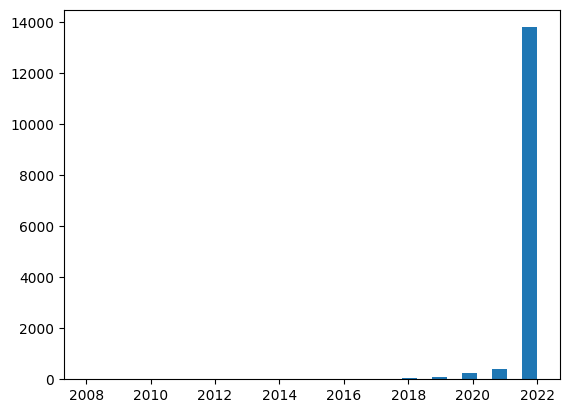

In [151]:
import matplotlib.pyplot as plt
# pd.Timestamp(result['time_listed'])
#result['time_listed'].to_timestamp()

df2 = pd.to_datetime(result['time'])
years = df2.dt.year
years
plt.hist(years, bins=30)


(array([1.790e+02, 4.638e+03, 7.024e+03, 1.757e+03, 5.300e+02, 1.740e+02,
        1.050e+02, 5.700e+01, 3.600e+01, 4.100e+01, 1.100e+01, 1.200e+01,
        2.200e+01, 4.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 5.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 2.00966667e+02, 4.00933333e+02, 6.00900000e+02,
        8.00866667e+02, 1.00083333e+03, 1.20080000e+03, 1.40076667e+03,
        1.60073333e+03, 1.80070000e+03, 2.00066667e+03, 2.20063333e+03,
        2.40060000e+03, 2.60056667e+03, 2.80053333e+03, 3.00050000e+03,
        3.20046667e+03, 3.40043333e+03, 3.60040000e+03, 3.80036667e+03,
        4.00033333e+03, 4.20030000e+03, 4.40026667e+03, 4.60023333e+03,
        4.80020000e+03, 5.00016667e+03, 5.20013333e+03, 5.40010000e+03,
        5.60006667e+03, 5.80003333e+03, 6.00000000e+03]),
 <BarContainer object of 30 artists>)

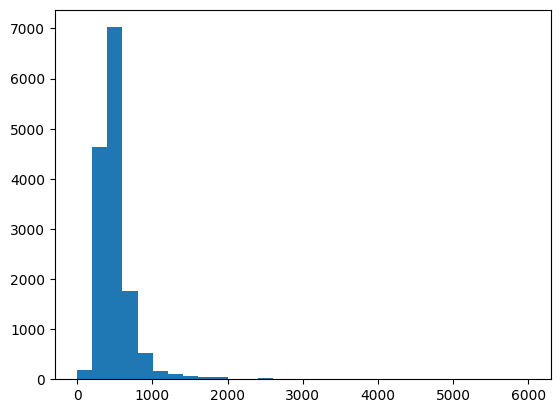

In [152]:
plt.hist(result['weekly_rent'], bins=30)